<a href="https://colab.research.google.com/github/urmidedhia/Synapse-Learning-Period/blob/week-3/Task3_Urmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [3902]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [3903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# import numpy, pandas, matplotlib, seaborn
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [3904]:
housing_path = "/content/gdrive/MyDrive/synapse_w2/housing_data.csv"
house_df = pd.read_csv(housing_path)
house_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [3905]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [3906]:
house_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [3907]:
for feature in house_df.columns:
  print(feature)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

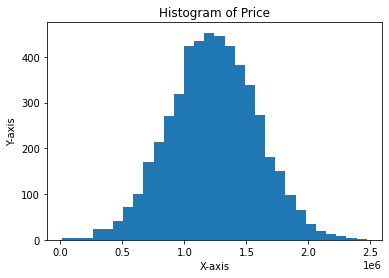

In [3908]:
# add code here
plt.hist(house_df['Price'], bins = 30)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title('Histogram of Price')
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [3909]:
corr_m = house_df.corr()
corr_m

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [3910]:
col = list(house_df.columns)
X_dict = {}
for feature in col:
  if house_df[feature].dtypes == 'float64':
    X_dict[feature] = house_df[feature]
X = pd.DataFrame(X_dict)
X.drop('Price', axis = 1, inplace = True)
y = pd.DataFrame({"Price" : house_df.Price})

In [3911]:
print(X.shape, y.shape)
# This code should print (5000, 5) and (5000,) if everything is correct

(5000, 5) (5000, 1)


In [3912]:
# print a few record of X
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [3913]:
# print a few record of y
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [3914]:
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [3915]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20) 


**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [3916]:
for df in [X_train, X_test, y_train, y_test]:
  print(df.size, df.shape)


17500 (3500, 5)
7500 (1500, 5)
3500 (3500, 1)
1500 (1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [3917]:
# add code for imports here
from sklearn.linear_model import LinearRegression
import sklearn.metrics 
from sklearn.model_selection import KFold

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here

lm = LinearRegression()

preds = []
ac = []
y_valid_plot = []

kf = KFold(n_splits=6, shuffle = True, random_state = 4)  #ran a for loop with range(5,11) to find the best value for n_splits
for train_index, valid_index in kf.split(X_train):
  X_train2, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
  y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
  lm.fit(X_train2, y_train2)
  preds.append(lm.predict(X_valid))
  ac.append(lm.score(X_valid, y_valid))
  y_valid_plot.append(y_valid)

train_r2score = np.mean(ac)
print(train_r2score)
print(ac)


0.919170268517301
[0.9188877790376864, 0.9192661446931258, 0.9238348267315504, 0.9162228372393523, 0.9142921518799545, 0.9225178715221363]


**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [3918]:
#lm.fit(X_train, y_train)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [3919]:
predictions_test = lm.predict(X_test)
print(type(predictions_test), predictions_test.size)

<class 'numpy.ndarray'> 1500


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

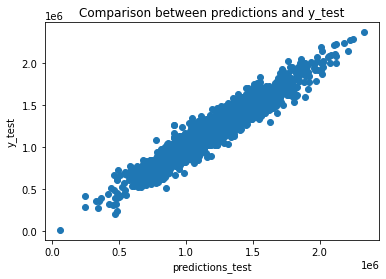

In [3920]:
#for test set

plt.xlabel('predictions_test')
plt.ylabel('y_test')
plt.title('Comparison between predictions and y_test')
fig = plt.scatter(predictions_test, y_test)

#for validation set

# for i in range(0,6):  
#   plt.xlabel('validation set predictions')
#   plt.ylabel('y_valid')
#   plt.title(f'Comparison between validation set prediction for fold {i} and y_test')
#   fig = plt.scatter(preds[i], y_valid_plot[i])
#   plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [3921]:
test_r2score = sklearn.metrics.r2_score(y_test, predictions_test)
print("R - squared value : ", test_r2score)
test_r2score = round(test_r2score, 3)
print("After rounding upto 3 decimal places : ", test_r2score)

print("\nHence, \nTrain accuracy = ", round(train_r2score,3),"\nTest accuracy = ", test_r2score)

R - squared value :  0.9138508583667801
After rounding upto 3 decimal places :  0.914

Hence, 
Train accuracy =  0.919 
Test accuracy =  0.914


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [3922]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [3923]:
classified_path = '/content/gdrive/MyDrive/synapse_w2/classified_data.txt'
df = pd.read_csv(classified_path, index_col = 0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [3924]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [3925]:
df.describe()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [3926]:
coln = list(df.columns)
coln

['WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

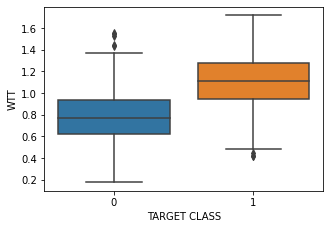

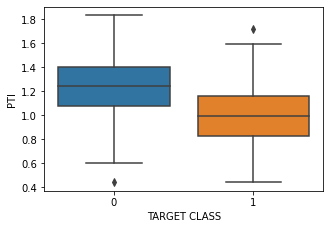

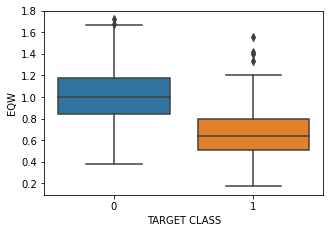

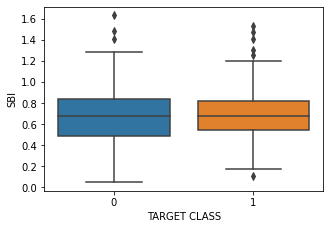

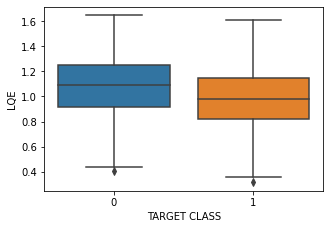

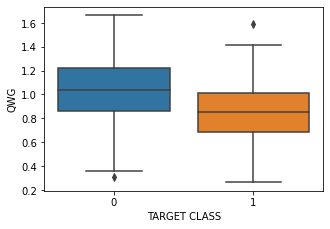

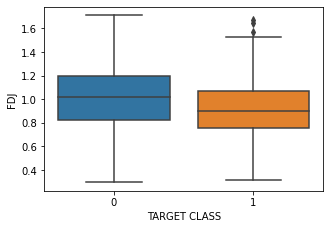

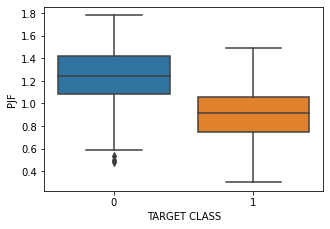

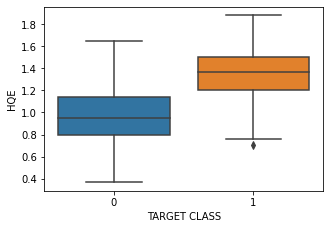

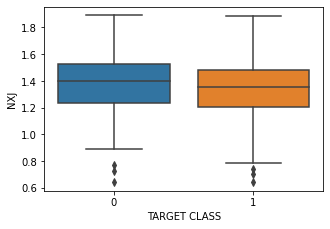

In [3927]:
i = 1
for feature in coln[:-1]:
  plt.figure(figsize=(5,40))
  plt.subplot(10,1,i)
  sb.boxplot(x = df['TARGET CLASS'], y = df[feature]) 
  plt.show()
  i+=1

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [3928]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [3929]:
scaler.fit(df.drop("TARGET CLASS", axis = 1))
scaler_arr = scaler.transform(df.drop("TARGET CLASS", axis = 1))

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [3930]:
df_feat = pd.DataFrame(scaler_arr)
df_feat = df_feat.set_axis(coln[:-1], axis=1)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [3931]:
X = df_feat
y = df[["TARGET CLASS"]]

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [3932]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [3933]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [3934]:
pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [3935]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [3936]:
N = y_test.size
y_test = y_test.to_numpy()
i = 0
n = 0
for value in y_test:
  if value == pred[i]:
    n+=1
  i+=1
accuracy = n/N
print("Accuracy : ",accuracy)
accuracy = round(accuracy, 3)
print("Accuracy after rounding up the decimal places : ",accuracy)


Accuracy :  0.9366666666666666
Accuracy after rounding up the decimal places :  0.937


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [3937]:
final_mean = []
kf = KFold(n_splits=9, shuffle = True, random_state = 10)

for j in range(0,60):
  ac_knn = []
  knn = KNeighborsClassifier(n_neighbors=j+1)

  for train_index, valid_index in kf.split(X_train):
    X_train2, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

    knn.fit(X_train2, y_train2.values.ravel())
    ac_knn.append(knn.score(X_valid, y_valid))

  final_mean.append(np.mean(ac_knn))

train_accuracy = max(final_mean)
max_index = final_mean.index(train_accuracy)

print(train_accuracy)
print(max_index)

# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here


0.9472379472379472
33


**Plot a graph of K value vs Accuracy**

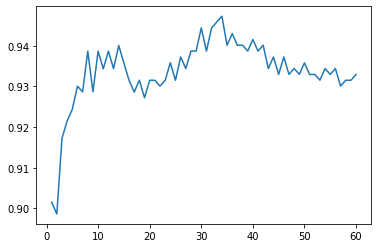

In [3938]:
plt.plot(range(1,61), final_mean)


**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [3939]:
# k = 12
# print("The final value for n_neighbors = ",k)
# print("Accuracy = ",acc[11])
# print("Chose the value of k as 12 because it gave the maximum accuracy")

In [3940]:
k = 34
test_accuracy_knn = []
knn = KNeighborsClassifier(n_neighbors=k)
for train_index, valid_index in kf.split(X_train):
  X_train2, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
  y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
  knn.fit(X_train2, y_train2.values.ravel())
  test_accuracy_knn.append(knn.score(X_test, y_test))
test_accuracy = np.mean(test_accuracy_knn)
print("Test_accuracy = ",test_accuracy,"\nTrain accuracy = ",train_accuracy)

Test_accuracy =  0.9500000000000001 
Train accuracy =  0.9472379472379472


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [3941]:
titanic_path = "/content/gdrive/MyDrive/synapse_w2/titanic_data.csv"
t_df = pd.read_csv(titanic_path)
t_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [3942]:
import re

def normalize(col_list):
  col_list = (col_list-col_list.min())/(col_list.max()-col_list.min())
  return col_list

def titanic_preprocessing_pipeline(train_df):
  title = []
  for name in train_df['Name']:
    temp = re.search('(\w+)(\.)', name)
    if temp:
      title.append(temp.group(1))  

  train_df['Title'] = title

  train_df.drop(['PassengerId','Ticket', 'Name'], axis = 1, inplace = True)

  perc_nan_total = []
  for column in train_df.columns:
    perc_nan = train_df[column].isna().sum()/len(train_df[column])
    perc_nan_total.append(perc_nan)

  nan_df = pd.DataFrame({'Column': train_df.columns, 'Percentage of Nans': perc_nan_total})  

  i = 0
  for perc in nan_df['Percentage of Nans']:
    if perc>0.5:
      train_df.drop(nan_df['Column'].values[i], axis = 1, inplace = True)
    i+=1

  embarked_mode = train_df['Embarked'].mode()[0]
  train_df['Embarked'] = train_df['Embarked'].replace(np.nan, embarked_mode)
  age_mean = train_df['Age'].mean()
  train_df['Age'] = train_df['Age'].replace(np.nan, age_mean)

  fam = []
  for i in range(0,len(train_df['Parch'])):
    temp = train_df['SibSp'][i] + train_df['Parch'][i]
    fam.append(temp)
  train_df['Family_members'] = fam
  train_df.drop(['SibSp','Parch'], axis = 1, inplace = True)

  train_df['Age'] = normalize(train_df['Age'])
  train_df['Fare'] = normalize(train_df['Fare'])
  train_df['Family_members'] = normalize(train_df['Family_members'])

  train_df = pd.get_dummies(train_df, columns= ['Pclass', 'Sex', 'Title', 'Embarked'])

  return train_df

X = titanic_preprocessing_pipeline(t_df)
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  #remove this line after writing the code

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [3943]:
y = X['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [3944]:
X.drop(['Survived'], axis = 1, inplace = True)
X

,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [3945]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [3946]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

max_depth_list = [5, 10, 15, 20, 25]
min_samples_leaf_list = [3, 4, 5, 6 ,7]
n_estimators_list = [5, 10, 15, 20, 25]

grid_list = []
train_rfc = []

kf = KFold(n_splits = 5)

for n in n_estimators_list:
  for i in max_depth_list:
    for k in min_samples_leaf_list:
      rfc = RandomForestClassifier(criterion = 'gini', random_state = 10, max_depth = i, min_samples_leaf = k, n_estimators = n)
        
      for train_index, valid_index in kf.split(X_train):
        X_train2, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
        rfc.fit(X_train2,y_train2)
        train_rfc.append(rfc.score(X_valid, y_valid)) 

      train_mean = np.mean(train_rfc)
      test_final = rfc.score(X_test, y_test)
      pred_final = rfc.predict(X_test)
      d = abs(train_mean - test_final)
      values_dict = {"criterion": 'gini',"max_depth_list" : i, "min_samples_split_list" : j, "min_samples_leaf_list" : k, "Train accuracy" : train_mean,"Test accuracy" : test_final, "Diff" : d, "Predictions" : pred_final}
      grid_list.append(values_dict) 

In [3947]:
sorted(grid_list, key = lambda values_dict:values_dict["Diff"])

[{'Diff': 9.266068849300702e-05,
  'Predictions': array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
         0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
         0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
         0, 0, 0, 0]),
  'Test accuracy': 0.80970149

In [3948]:
max_list = sorted(grid_list, key = lambda values_dict:values_dict["Test accuracy"], reverse = True)
max_list

[{'Diff': 0.018673423206547857,
  'Predictions': array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
         0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
         1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
         0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
         0, 0, 0, 0]),
  'Test accuracy': 0.832089552

<b>print the test accuracy and train accuracy here</b>

In [3949]:
print("Test accuracy : ",max_list[0]['Test accuracy'],"\nTrain accuracy : ",max_list[0]['Train accuracy'])
print(max_list[0])

Test accuracy :  0.832089552238806 
Train accuracy :  0.8134161290322581
{'criterion': 'gini', 'max_depth_list': 5, 'min_samples_split_list': 59, 'min_samples_leaf_list': 6, 'Train accuracy': 0.8134161290322581, 'Test accuracy': 0.832089552238806, 'Diff': 0.018673423206547857, 'Predictions': array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1

Accuracy, Precision, Recall, F1 Score

In [3950]:
def metrics():
  tp, tn, fp, fn = values(max_list[0]["Predictions"],y_test)
  acc = (tp+tn)/(tp+tn+fp+fn)
  precision = (tp)/(tp+fp)
  recall = (tp)/(tp+fn)
  F1_score = (2*precision*recall)/(precision+recall)
  print("\nAccuracy : ", acc)
  print("Precision : ", precision)
  print("Recall : ", recall)
  print("F1 Score : ", F1_score)

def values(pred_y, y_test):
  tp = sum((pred_y == 1) & (y_test == 1))
  tn = sum((pred_y == 0) & (y_test == 0))
  fp = sum((pred_y == 1) & (y_test == 0))
  fn = sum((pred_y == 0) & (y_test == 1))
  df_confusion = pd.crosstab(y_test, pred_y)
  print("\nTrue positive : ",tp,"\nTrue negative : ",tn,"\nFalse positive : ",fp,"\nFalse negative : ",fn)
  return tp,tn,fp,fn

print("*Scores*")
metrics()

*Scores*

True positive :  82 
True negative :  141 
False positive :  16 
False negative :  29

Accuracy :  0.832089552238806
Precision :  0.8367346938775511
Recall :  0.7387387387387387
F1 Score :  0.784688995215311
